In [1]:
#checking the ta-lib installation is correct

import talib
print("TA-Lib version:", talib.__version__)


TA-Lib version: 0.5.1


In [2]:
import sys
import os

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

# Importing the module
import finance_utils as fu

# Loading stock price data
file_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-01\\data\\AAPL_historical_data.csv'
stock_data = fu.load_stock_data(file_path)

# Prepare the data
prepared_data = fu.prepare_stock_data(stock_data) 


# Display the first few rows of the processed data
print(prepared_data.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
# Import the module
import technical_analysis_indicator as ta

# Add a 20-day Simple Moving Average (SMA) to the prepared data
prepared_data = ta.add_sma(prepared_data, period=20)

# Add a 14-day Relative Strength Index (RSI) to the prepared data
prepared_data = ta.add_rsi(prepared_data, period=14)

# Add Bollinger Bands to the prepared data
prepared_data = ta.add_bollinger_bands(prepared_data, period=20)

# Add MACD to the prepared data
prepared_data = ta.add_macd(prepared_data)


# To handle NaN values
prepared_data = prepared_data.dropna()

# Display the first few rows
print(prepared_data.head(10))


         Date      Open      High       Low     Close  Adj Close    Volume  \
33 1981-01-30  0.127232  0.127232  0.126116  0.126116   0.097223  46188800   
34 1981-02-02  0.119420  0.119420  0.118862  0.118862   0.091630  23766400   
35 1981-02-03  0.123326  0.123884  0.123326  0.123326   0.095072  19152000   
36 1981-02-04  0.127790  0.128348  0.127790  0.127790   0.098513  27865600   
37 1981-02-05  0.127790  0.128906  0.127790  0.127790   0.098513   7929600   
38 1981-02-06  0.128348  0.128906  0.128348  0.128348   0.098943  13865600   
39 1981-02-09  0.122768  0.122768  0.121652  0.121652   0.093781  16755200   
40 1981-02-10  0.121652  0.122210  0.121652  0.121652   0.093781  18345600   
41 1981-02-11  0.118304  0.118304  0.117746  0.117746   0.090770  13843200   
42 1981-02-12  0.117188  0.117188  0.116629  0.116629   0.089909  14560000   

    Dividends  Stock Splits    SMA_20        RSI  BB_upper  BB_middle  \
33        0.0           0.0  0.140681  39.642837  0.151717   0.14068

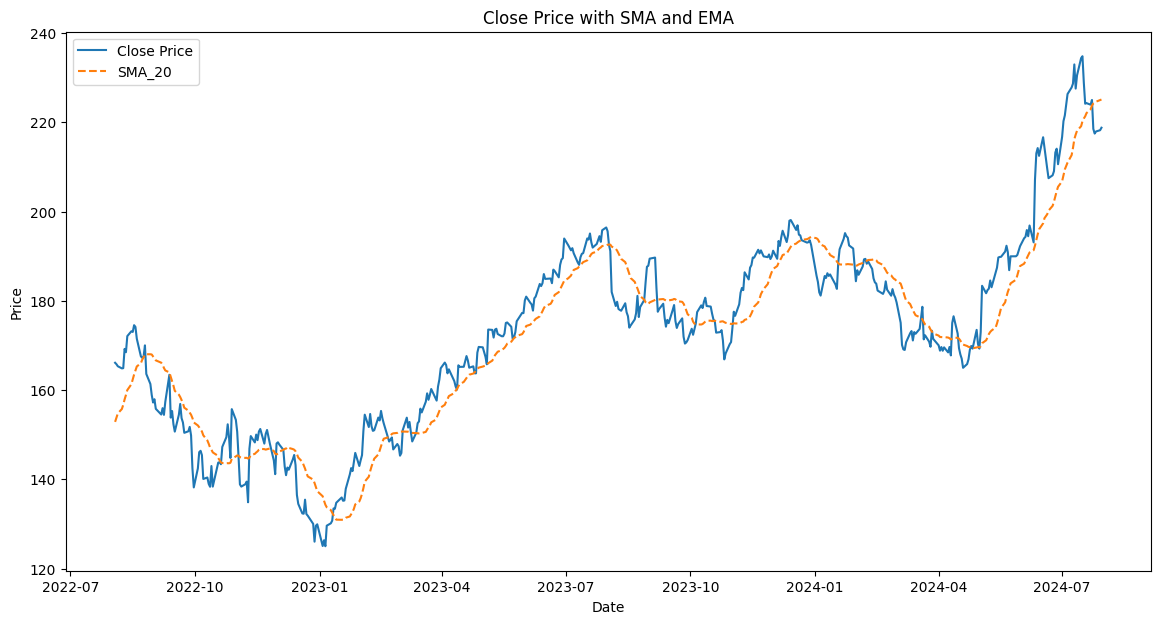

In [4]:
import visualization_utils as vu

# plot of the stock's close price with SMA and EMA with limited rows
vu.plot_close_with_moving_averages(prepared_data, num_rows=500)


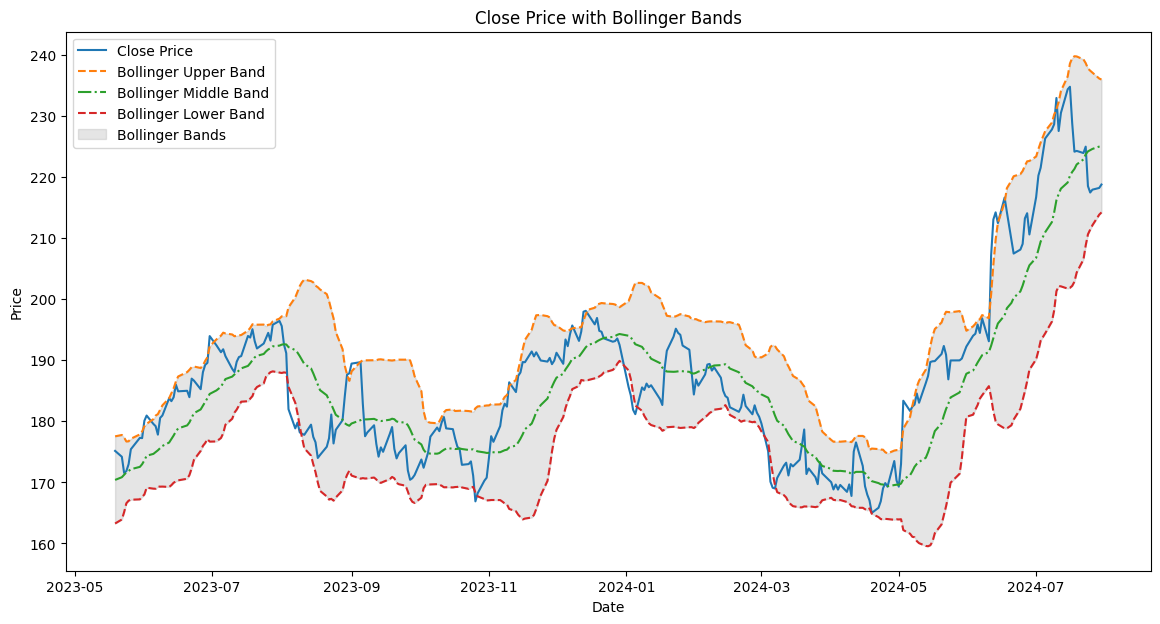

In [5]:
# plot of the stock's close price with Bollinger Bands with limited rows
vu.plot_bollinger_bands(prepared_data, num_rows=300)



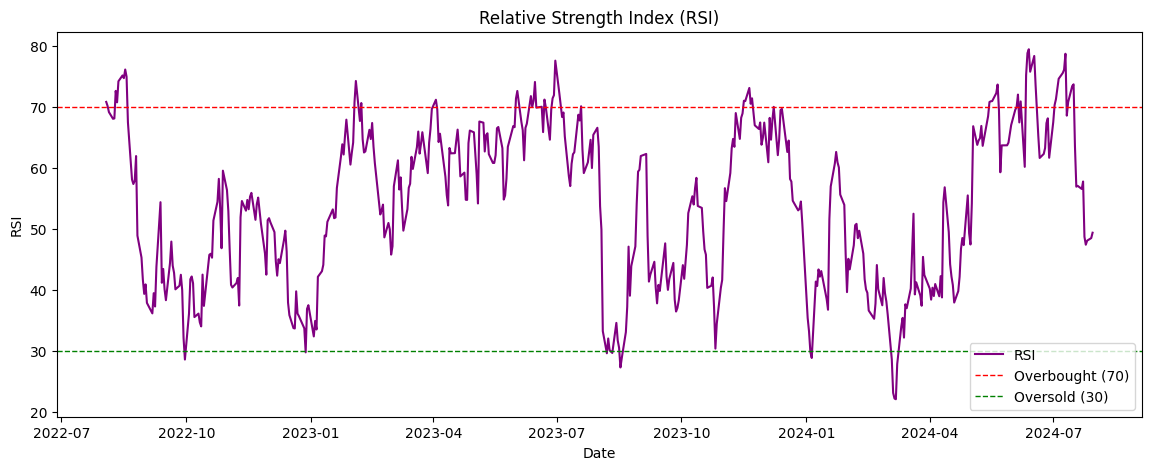

In [6]:
# plot of the RSI (Relative Strength Index) with limited rows
vu.plot_rsi(prepared_data, num_rows=500)

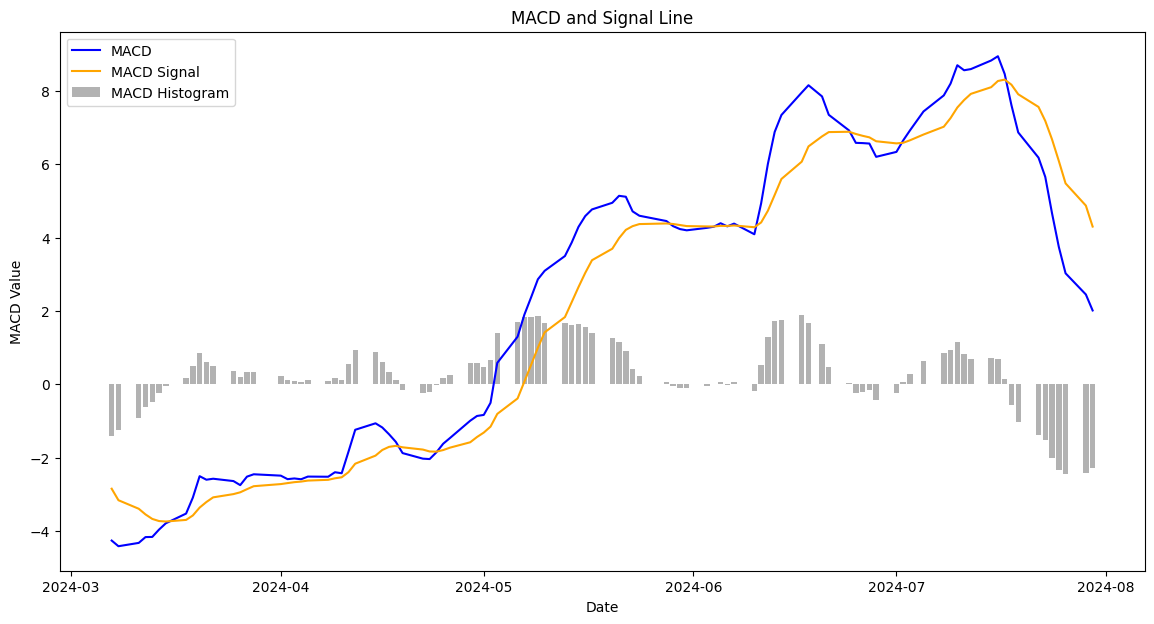

In [7]:
# plot the MACD (Moving Average Convergence Divergence) with limited rows
vu.plot_macd(prepared_data, num_rows=100)

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-01\scripts\visualization_utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])


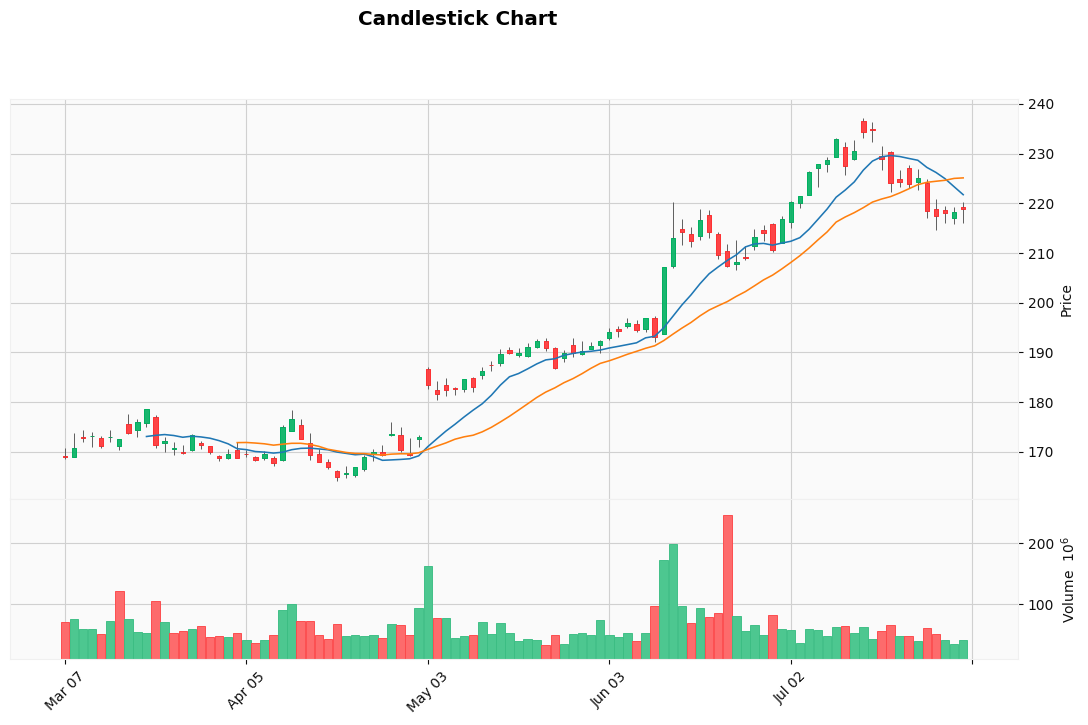

In [8]:
# plot of the candlestick chart with limited rows
vu.plot_candlestick_chart(prepared_data, num_rows=100)

In [25]:
# financial analysis using pynance 

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

import importlib
import pynance_analysis as pa
importlib.reload(pa)

# define stock symbol and data range
symbol = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'

# fetch data using fetch_data function
data = pa.fetch_data(symbol, start_date, end_date)

# check the fetched data
print(data.head())
print(data.columns)



        Date     Open     High      Low    Close        Volume
0 2023-12-29  193.167  193.665  191.001  191.803  4.283407e+07
1 2023-12-28  193.406  193.925  192.440  192.848  3.417910e+07
2 2023-12-27  191.763  192.768  190.367  192.420  4.827016e+07
3 2023-12-26  192.878  193.157  192.101  192.320  2.902905e+07
4 2023-12-22  194.442  194.672  192.240  192.868  3.729054e+07
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [26]:
# function for calculating technical indicator
data = pa.calculate_indicators(data)
print(data.head())


         Date     Open     High      Low    Close        Volume     SMA_20  \
19 2023-12-01  189.611  190.836  188.515  190.516  4.587826e+07  193.57405   
20 2023-11-30  189.122  189.601  187.478  189.232  4.897952e+07  193.44550   
21 2023-11-29  190.179  191.364  188.255  188.655  4.317745e+07  193.23585   
22 2023-11-28  189.062  190.358  188.685  189.679  3.856119e+07  193.09880   
23 2023-11-27  189.202  189.949  188.185  189.072  4.070649e+07  192.93640   

        EMA_20        RSI  BB_middle    BB_upper    BB_lower      MACD  \
19  192.921718  42.607046  193.57405  198.069925  189.078175 -0.331507   
20  192.570316  40.009043  193.44550  198.288238  188.602762 -0.575676   
21  192.197429  33.463445  193.23585  198.529547  187.942153 -0.806445   
22  191.957578  37.992800  193.09880  198.618530  187.579070 -0.896370   
23  191.682761  32.149602  192.93640  198.736606  187.136194 -1.005030   

    MACD_signal  MACD_hist  
19     0.315087  -0.646594  
20     0.136934  -0.712610  

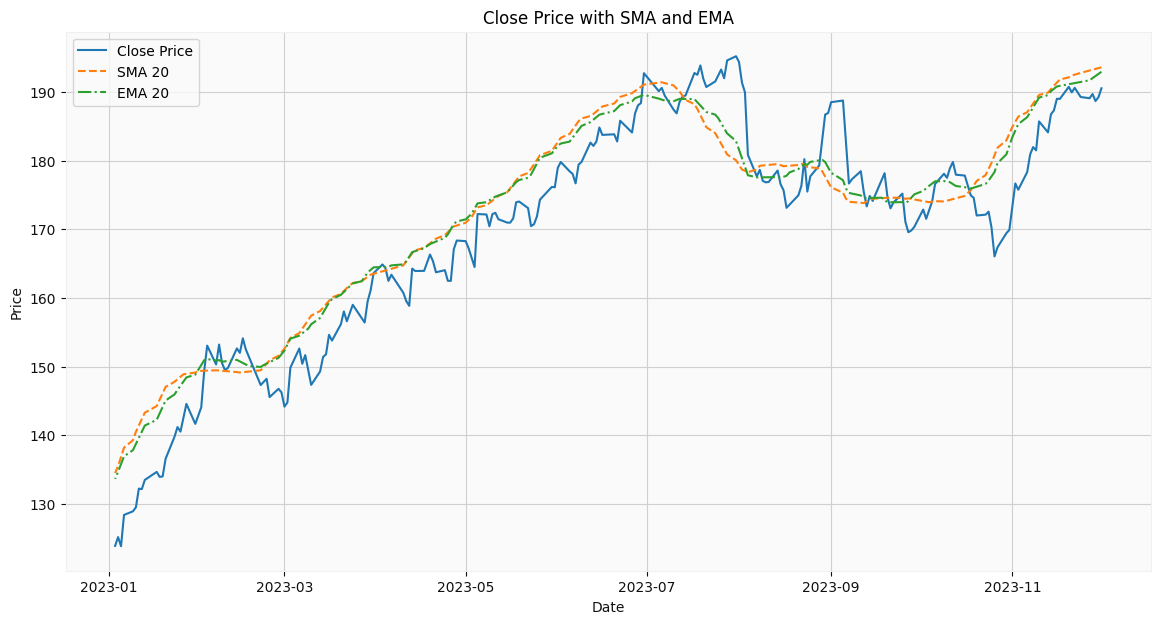

In [27]:
# visulazation of close price with sma amd ema 
pa.plot_close_with_indicators(data)

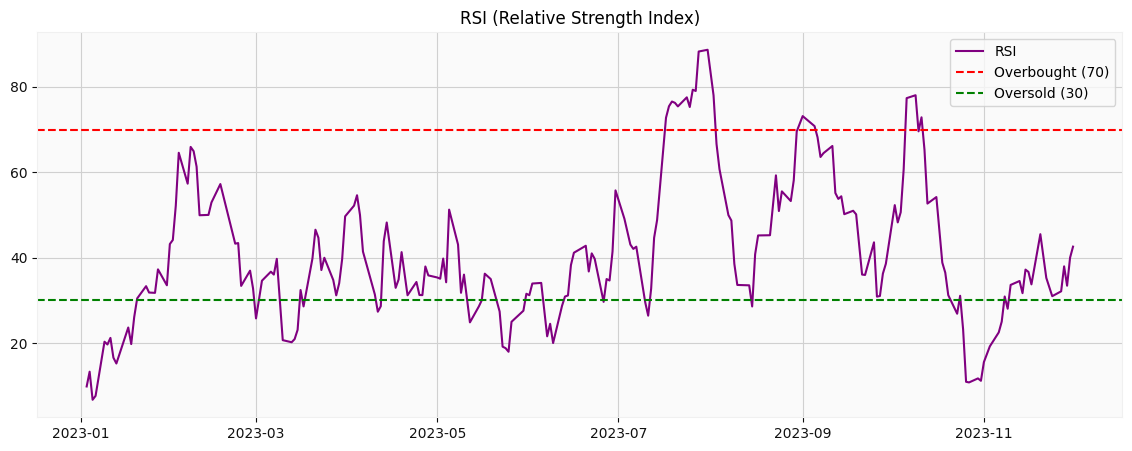

In [28]:

pa.plot_rsi(data)

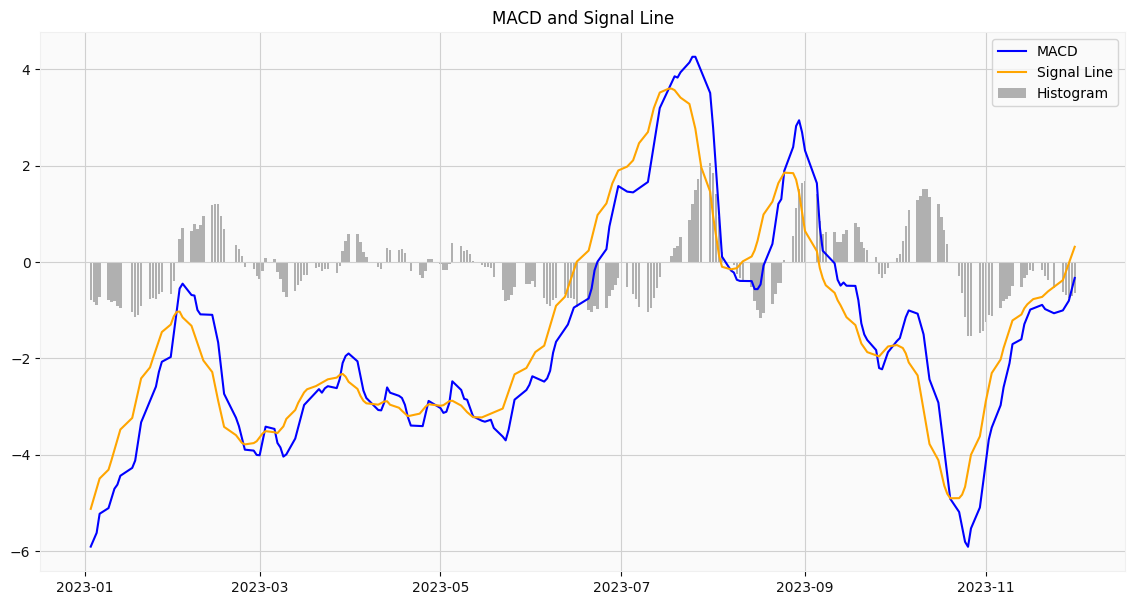

In [29]:
pa.plot_macd(data)

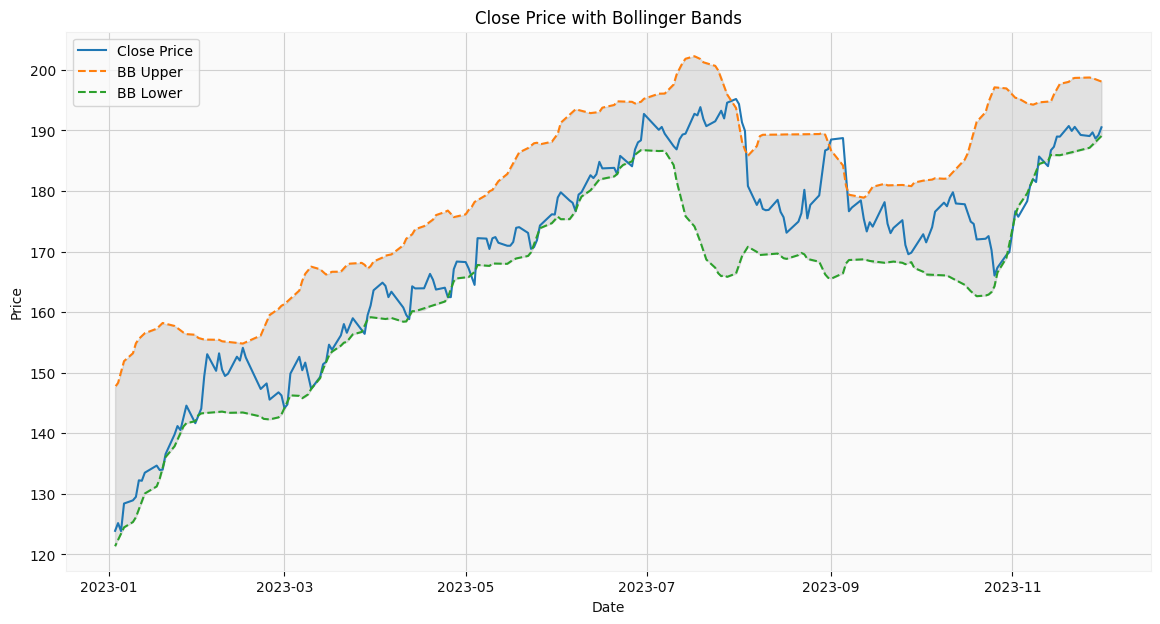

In [30]:
pa.plot_bollinger_bands(data)

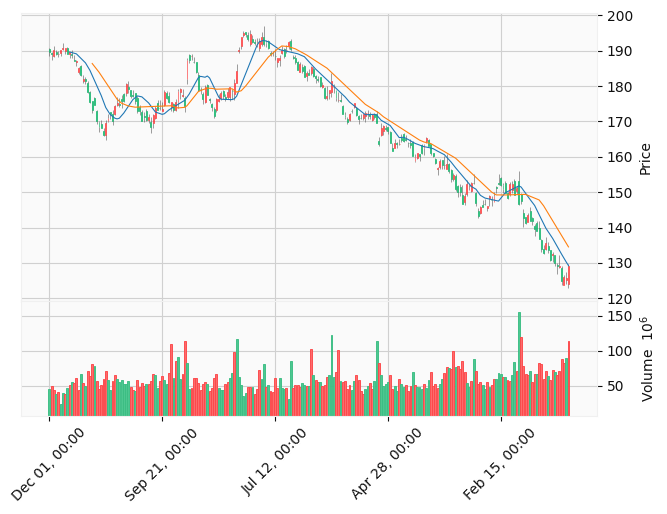

In [31]:
pa.plot_candlestick_chart(data)